# Trabalho Final GCC-108 - Teoria da Computação #
Prof.: Douglas H. S. Abreu

Nome: Caio Matheus Leite da Silva e Katarina Lydia Friedrich

Turma: 10A

Link do repositório [GitHub](https://github.com/CaioMatheu5/Trabalho_Final_GCC108)

_______________________________________________________________________________________________________________________________

●	O trabalho deve ser feito em grupos de no máximo 2 componentes

●	Trabalhos entregues após a data limite não serão aceitos

●	Data limite de entrega: 29 de Abril de 2022 : 23h59m

●	Enviar o trabalho para o campus virtual, do seguinte modo: Notebook exportado em PDF contendo o código e também o link do repositório GitHub para acesso aos arquivos. A Documentação deve estar no readme

●	O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python
_______________________________________________________________________________________________________________________________ 

# Introdução
Este trabalho propõe a utilização de operações da aritmética computacional por meio de uma Máquina de Turing. A máquina que foi desenvolvida recebe como entrada dois números em binário e gera como saída o resultado da adição desses números.

### Números binários e adição em números binários 

Os números binários são utilizados para representar dados em um meio digital, como por exemplo, a representação no meio analógico com presença ou ausência de carga elétrica e no meio digital por meio de zeros e uns. Essa representação com dois símbolos utiliza-se da mesma técnica do telégrafo, que transmitia mensagens por código Morse, sendo os símbolos curto e longo análogos ao zero e um (1).

Utilizando-se a notação binária é possível representar uma faixa de valores diferentes de acordo com a quantidade de bits. Por exemplo, com dois bits pode-se representar quatro valores distintos, sendo eles 00, 01, 10 e 11. Ou seja, com n bits, podemos representar 2n valores distintos. 

Para a notação de números inteiros usando a base binária de zeros e uns, podemos representar os números utilizando as seguintes representações: de binário puro, de binários em sinal magnitude e a representação em complemento de 2 (1).

Tomando como base a representação de números inteiros na base binária pura, que também é a representação utilizada neste trabalho, pode-se observar na Tabela 1, que com quatro bits temos as seguintes possibilidades para números inteiros.

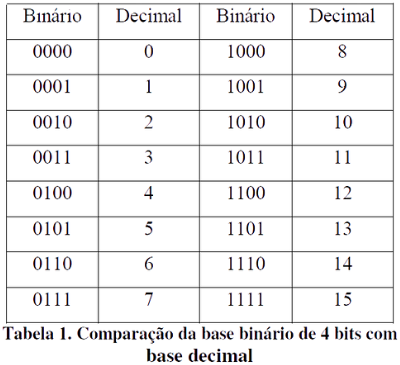

As operações matemáticas de adição e subtração feitas na base binária seguem as mesmas regras da base decimal, contando com a diferença que temos apenas dois dígitos. Para a adição de dois números, temos quatro possibilidades de valores, sendo elas: 0 + 0, 0 + 1, 1 + 0, e 1 + 1. As três primeiras têm os mesmos resultados de uma operação em decimal, já para a operação de 1 + 1 temos como resultado zero, gerando um “vai um” para a coluna da esquerda (1).

### Máquina de Turing

Turing descreve um computador digital como sendo formado por: uma unidade de armazenamento, uma unidade de execução e uma unidade de controle. A unidade de armazenamento é formada por uma fita, dividida em células, com um cabeçote apontando para a célula atual, a qual pode ser lida/escrita de acordo com a unidade de execução. Por sua vez, a unidade de execução tem como objetivo fazer a leitura do caractere representado na célula atual, analisar o que deve ser feito e alterar quando necessário. Já a unidade de controle faz as movimentações do cabeçote de acordo com o que a unidade de execução deseja, movendo o cabeçote para esquerda ou direita (2).
_______________________________________________________________________________________________________________________________

### Exercício 1)
Descreva com suas palavras uma estratégia para o desenvolvimento de uma maquina de Turing que compute a soma de 2 numeros binário.
_

__________________

### Exercício 2) 
Faça o esboço por meio de desenho da máquina de Turing proposta.

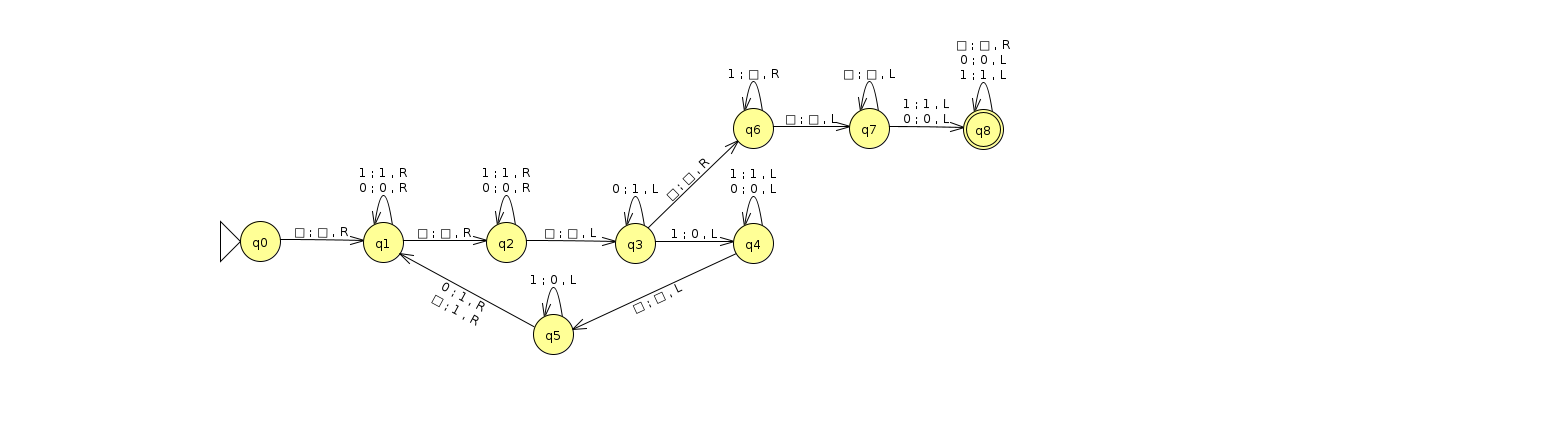

__________

### Exercício 3)
Defina a MT como uma quíntupla M=(Q,Σ,Γ,δ,q_0):
	
    Q = conjunto de estados (padrão q[0-9]+)
	
    Σ = alfabeto de entrada
	
    Γ = alfabeto da fita
	
    δ = função de transição no formato (q_i,x)→(q_j,y,D); assim, estando no estado q_i, lendo x, vai para o estado q_j, escreve y e movimenta na direção de D. D será L para esquerda ou R para direita.
    
    q_0 = estado inicial

____

### Exercício 4)
Faça a conversão de M em R(M)

____

### Exercício 5) 
Desenvolva uma função MTU que receba R(M) acrescido de uma entrada w, onde w é um arquivo csv que contem dois números binário. A saída da função MTU deve ser a computação de M para uma entrada w.

In [19]:
# função MTU = {R(M)| R(M) aceite w}

N = 1000 # tape length, initialize to a large value
 
class TuringMachine:
 
    '''
    initialize the Turing Machine, read the program and input
    '''
    def __init__(self, program, input, state=0):
     self.trf = {}
     self.state = str(state)
     self.tape = ''.join(['_']*N)
     self.head = N // 2   # head is positioned in the middle
     self.tape = self.tape[:self.head] + input + self.tape[self.head:]
     for line in program.splitlines():
       s, a, r, d, s1 = line.split(' ')
       self.trf[s,a] = (r, d, s1)

    '''
    step through a program
    '''
    def step(self):
      if self.state != 'H':
         # assert self.head >= 0 and self.head < len(self.tape) here
         a = self.tape[self.head]
         action = self.trf.get((self.state, a))
         if action:
            r, d, s1 = action
            self.tape = self.tape[:self.head] + r + self.tape[self.head+1:]
            if d != '*':
               self.head = self.head + (1 if d == 'r' else -1)
            self.state = s1
            print(self.tape.replace('_', ''), self.state)

    '''
    run a program
    '''
    def run(self, max_iter=9999):
       iter = 0
       while self.state != 'H' and iter < max_iter: # prevent infinite loop
           self.step()
           iter += 1
       print(self.tape.replace('_', ''), self.state)


In [20]:
input = '1101_101'
program = open('program.txt').read()
tm = TuringMachine(program, input)
tm.run()
# 10010 H

1101101 0
1101101 0
1101101 0
1101101 0
1101101 1
1101101 1
1101101 1
1101101 1
1101101 2
1101100 3
1101100 3
1101100 3
1101100 4
1100100 4
1110100 0
1110100 0
1110100 1
1110100 1
1110100 1
1110100 1
1110100 2
1110101 2
1110111 2
1110011 3
1110011 4
1111011 0
1111011 1
1111011 1
1111011 1
1111011 1
1111011 2
1111010 3
1111010 3
1111010 3
1111010 4
1110010 4
1100010 4
1000010 4
0000010 4
10000010 0
10000010 0
10000010 0
10000010 0
10000010 0
10000010 1
10000010 1
10000010 1
10000010 1
10000010 2
10000011 2
10000001 3
10000001 3
10000001 4
10001001 0
10001001 1
10001001 1
10001001 1
10001001 1
10001001 2
10001000 3
10001000 3
10001000 3
10001000 4
10000000 4
10010000 0
10010000 0
10010000 1
10010000 1
10010000 1
10010000 1
10010000 2
10010001 2
10010011 2
10010111 2
10010111 5
1001011 5
100101 5
10010 5
10010 H
10010 H


____

### Exercício 6) (3)

#### _A)_ Explique a Tese de Chuch-Turing de forma sucinta

#### _B)_ Dada uma máquina de Turing arbitrária M e uma string de entrada w, a computação de M com entrada w irá parar em menos de 100 transições? Descreva uma máquina de Turing que resolva esse problema de decisão.

#### _C)_ Motre a solução para cada um dos seguintes sitemas de correspondência de Post:

##### a) (a, aa), (bb, b), (a, bb)

##### b) (a, ab), (ba, aba), (b, aba), (bba, b)

##### c) (abb, ab), (aba, ba), (aab,a bab)

##### d) (ab,aba), (baa, aa), (aba, baa)

##### e) (a, aaa), (aab, b), (abaaa, ab)

##### f) (ab, bb), (aa, ba), ab, abb), (bb, bab)

#### _D)_ Prove que a função é primitiva recursiva
 
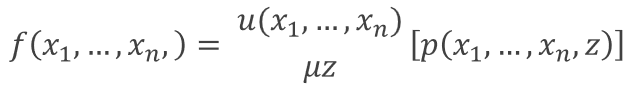

sempre que _p_ e _u_ são recursivas primitivas 

#### _E)_ _Exercício sobre complexidade de uma MT (a definir)_

_________________________________________________________________________________________________________________

# Referências

(1) _Ronald. J. Tocci, Neal. S. Widmer e Gregory L. Moss. 2011. Sistemas Digitais: Princípios e Aplicações. (11ª ed.). Pearson._

(2) _Alan Turing. 1937. Computability and λ-definability. Journal of Symbolic Logic, 2, 4: 153–163._

(3) _Sudkamp, T. A. 2006. Languages and machines: an introduction to the theory of computer science. 3rd Edition_

_______________________________________________________________________________________________________________________________

_______________________________________________________________________________________________________________________________
# Links úteis:

Link do site [Jupyter](https://jupyter.org/)

Link do site [Anaconda](https://www.anaconda.com/)

Link para ajuda com [Markdown no Notebook](https://acervolima.com/celula-markdown-no-caderno-jupyter/)


In [11]:
import pandas as pd
exemplo = pd.read_csv('exemplo2.CSV')
exemplo

,1011000;1101


In [17]:
txt = "0001110101001110110011110011111110101011010001111111011111"

x = txt.split("000")
print(x)
y = txt.split("00")
print(y)
print(len(y[2]))

['', '111010100111011001111001111111010101101', '1111111011111']
['', '01110101', '111011', '1111', '1111111010101101', '01111111011111']
6
